In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
response_col = ["Coal_Share_PhasedOut","Coal_Gen_Decline_Perc","Gas_Gen_Decline_Perc"]
selected_indep = [#"logGDPpc",
    "num_supply_policy", "WDI_Coal_El_.","WDI_NG_El_.", "Share_VRE_Gen",
                    "Coal_logCurrent_MW","Gas_logCurrent_MW","LogBP_GasR2P_yr",
                    "HHI_Coal_Import","HHI_Gas_Import","NetValue_Coal_Import","NetValue_Gas_Import"]
binary_col = ["R_Choice"]
rate_col = ["rate_coal_cap_5y","rate_coal_gen_5y","rate_gas_gen_5y"]

In [3]:
truncated = pd.read_csv("../temporal_country_models/imputation/coal_data_amelia_impAll.csv")
truncated = truncated.set_index("Unnamed: 0")
truncated = truncated[response_col+selected_indep+binary_col]

In [4]:
truncated_std = truncated.copy()
# assume the negative phase out variables are positive
#for col_name in response_col:
#    fix_index = truncated_std[truncated_std[col_name]<0].index
#    truncated_std.loc[fix_index, col_name] = 0
truncated_std[selected_indep+response_col] = StandardScaler().fit_transform(truncated_std[selected_indep+response_col])
truncated_std.to_csv("data_clustering.csv")
truncated_std

,Coal_Share_PhasedOut,Coal_Gen_Decline_Perc,Gas_Gen_Decline_Perc,num_supply_policy,WDI_Coal_El_.,WDI_NG_El_.,Share_VRE_Gen,Coal_logCurrent_MW,Gas_logCurrent_MW,LogBP_GasR2P_yr,HHI_Coal_Import,HHI_Gas_Import,NetValue_Coal_Import,NetValue_Gas_Import,R_Choice
Unnamed: 0,,,,,,,,,,,,,,,
AGO-2017,-0.282271,-0.385317,-0.307092,1.603317,-0.807329,-0.272712,-0.396314,-1.278531,-0.131304,-0.595262,1.540009,0.812922,-0.004024,-0.168026,0.0
AGO-2018,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.406118,-0.401152,-1.278531,-0.131304,-0.595262,0.744938,-0.846312,-0.002532,-0.219892,0.0
AGO-2019,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.260609,-0.405162,-1.278531,-0.131304,-0.595262,1.524391,-0.148899,-0.007150,-0.178880,0.0
AGO-2020,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.296971,-0.406599,-1.278531,-0.131304,-0.595262,1.370326,-0.250561,-0.008906,-0.153122,0.0
AGO-2021,-0.282271,-0.385317,-0.307092,2.145738,-0.807329,-0.246891,-0.406418,-1.278531,-0.131304,-0.595262,1.381785,0.824350,-0.008661,-0.417218,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE-2017,-0.282271,-0.385317,-0.307092,-0.023948,0.777035,-1.003199,-0.404209,0.391204,-2.275119,-0.595262,0.052004,0.548059,-0.010275,-0.017865,0.0
ZWE-2018,-0.282271,-0.385317,-0.307092,0.247263,0.740939,-1.003199,-0.391633,0.391204,-2.275119,-0.595262,1.185963,0.920323,-0.010203,-0.017878,0.0
ZWE-2019,-0.282271,-0.385317,-0.307092,0.518474,0.886684,-1.003199,-0.369056,0.391204,-2.275119,-0.595262,-0.061621,-0.623138,-0.011100,-0.017870,0.0


### Explained variance

In [5]:
pca = PCA()
pca.fit(truncated_std)

PCA()

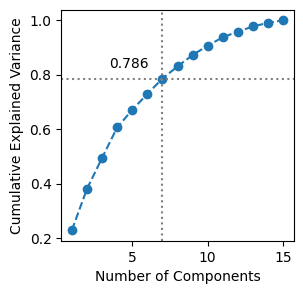

In [7]:
plt.figure(figsize = (3,3))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker = "o", linestyle = "--")
#plt.title("Explained Varience by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axvline(7,color="gray",linestyle=":")
reached_var = pca.explained_variance_ratio_[:7].sum()
plt.axhline(reached_var,color="gray",linestyle=":")
plt.text(3.5,reached_var*1.05,str(round(reached_var,3)))
plt.savefig("pca_variance.png",dpi=600, bbox_inches='tight')

### Select the number of components

In [8]:
pca2 = PCA(n_components = 7)
pca2.fit(truncated_std)

PCA(n_components=7)

In [9]:
scores_pca = pca2.transform(truncated_std)
scores_pca

array([[-1.10627499,  0.94956865, -0.7572681 , ..., -0.54373882,
         1.24041686,  0.9773524 ],
       [-0.39229075,  1.05859012, -0.83924598, ..., -1.40055975,
         0.68566137, -0.00826996],
       [-0.75171552,  1.12231802, -0.85664241, ..., -1.25259964,
         1.2747482 ,  0.45787496],
       ...,
       [-0.14266324, -1.90265688, -1.29769056, ..., -0.76165929,
        -0.03453257, -0.54815714],
       [-0.35923066, -1.946274  , -1.25977786, ..., -0.50827334,
         0.26871303, -0.07135859],
       [-0.65212184, -1.99039797, -1.22071343, ..., -0.1888181 ,
         0.69480554,  0.55190787]])

C:\Users\jx920\AppData\Local\Temp\ipykernel_10364\3765089567.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(np.arange(8)+1)


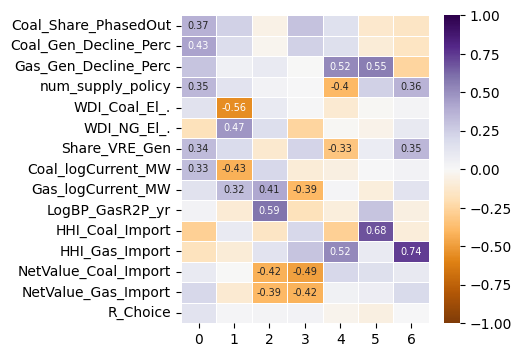

In [10]:
fig, axes = plt.subplots(figsize=(4,4))
plot_data = pd.DataFrame(pca2.components_,columns=truncated_std.columns).T
axes.set_xticklabels(np.arange(8)+1)
sns.heatmap(plot_data,vmin=-1,vmax=1,cmap="PuOr")
sns.heatmap(plot_data.mask(plot_data > -0.3), cmap="PuOr", vmin=-1,vmax=1,
            linewidths=.5, cbar=None, annot=True,annot_kws={"fontsize":7},fmt='.2g')
sns.heatmap(plot_data.mask(plot_data < 0.3), cmap="PuOr", vmin=-1,vmax=1,
            linewidths=.5, cbar=None, annot=True,annot_kws={"fontsize":7},fmt='.2g')
fig.savefig("pca_variables.png",dpi=600, bbox_inches='tight')